In [1]:
# Initial imports
import os
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime 
import yfinance as yf
import backtrader as bt
%matplotlib inline

#download csv as original df
og_betas_df = pd.read_csv(Path('../../../Betas.csv'))  
#create new df to leave original df alone. Set index to Ticker 
betas_df = og_betas_df.set_index('Ticker')

#display df
betas_df

,Beta 09/2012,Beta 09/2022,Beta 12/2008,Beta 9/2008
Ticker,,,,
NXPI,3.6130,1.4149,NaN,NaN
LULU,2.3932,1.2971,2.1419,1.8343
AMD,2.2121,1.9441,2.4404,2.5507
SIRI,2.1154,0.9241,2.5329,3.0197
ADSK,2.1115,1.4623,2.3257,2.1548
...,...,...,...,...
VRTX,0.3325,0.4960,1.0370,0.8088
VRSK,0.1337,0.8391,NaN,NaN
PANW,0.0165,1.2415,NaN,NaN


In [2]:
#display corralation of 2012 and 2022 betas
betas_df[["Beta 09/2012","Beta 09/2022"]].corr(method='pearson')

,Beta 09/2012,Beta 09/2022
Beta 09/2012,1.000000,0.395354
Beta 09/2022,0.395354,1.000000


In [3]:
#Separate df into 3 dfs
betas_df_2012 = betas_df.sort_values(by=['Beta 09/2012'])
betas_df_2012 = betas_df_2012[['Beta 09/2012']].dropna()
betas_df_12_2008 = betas_df.sort_values(by=['Beta 12/2008'])
betas_df_12_2008 = betas_df_12_2008[['Beta 12/2008']].dropna()
betas_df_9_2008 = betas_df.sort_values(by=['Beta 9/2008'])
betas_df_9_2008 = betas_df_9_2008[['Beta 9/2008']].dropna()

In [4]:
#Separate 3 dfs into 6 dataframes

#number 1
low_betas_df_2012 = betas_df_2012.head(10)
low_betas_df_2012

,Beta 09/2012
Ticker,
META,-0.1001
SPLK,0.0020
PANW,0.0165
VRSK,0.1337
VRTX,0.3325
DLTR,0.3475
XEL,0.3523
TSLA,0.3849
ORLY,0.3875


In [5]:
#number 2
high_betas_df_2012 = betas_df_2012.tail(10)
high_betas_df_2012

,Beta 09/2012
Ticker,
FTNT,1.7109
KLAC,1.7515
BIDU,1.8036
MELI,1.9264
ALGN,2.0641
ADSK,2.1115
SIRI,2.1154
AMD,2.2121
LULU,2.3932


In [6]:
#number 3
low_betas_df_12_2008 = betas_df_12_2008.head(10)
low_betas_df_12_2008

,Beta 12/2008
Ticker,
TMUS,0.1323
ODFL,0.2799
AZN,0.4290
AMGN,0.4416
DLTR,0.4623
GILD,0.5433
ADP,0.5536
XEL,0.5581
PEP,0.5757


In [7]:
#number 4
high_betas_df_12_2008 = betas_df_12_2008.tail(10)
high_betas_df_12_2008

,Beta 12/2008
Ticker,
LULU,2.1419
AMZN,2.1560
ALGN,2.1885
BIDU,2.2487
ADSK,2.3257
NVDA,2.3955
AMD,2.4404
SIRI,2.5329
DXCM,2.5423


In [8]:
#number 5
low_betas_df_9_2008 = betas_df_9_2008.head(10)
low_betas_df_9_2008

,Beta 9/2008
Ticker,
PEP,0.2107
TMUS,0.3286
ODFL,0.3764
ILMN,0.4548
IDXX,0.4742
MDLZ,0.5031
AZN,0.5178
BIIB,0.5308
ADP,0.5733


In [9]:
#number 6
high_betas_df_9_2008 = betas_df_9_2008.tail(10)
high_betas_df_9_2008

,Beta 9/2008
Ticker,
AMZN,2.2728
ALGN,2.3201
ASML,2.3883
DXCM,2.4084
AMD,2.5507
BIDU,2.6021
AAPL,2.6179
NVDA,2.9969
SIRI,3.0197


In [10]:
#merge both 2008 low beta dfs with outer join
low_betas_df_2008 = pd.merge(low_betas_df_12_2008,low_betas_df_9_2008, on='Ticker', how='outer')
low_betas_df_2008

,Beta 12/2008,Beta 9/2008
Ticker,,
TMUS,0.1323,0.3286
ODFL,0.2799,0.3764
AZN,0.4290,0.5178
AMGN,0.4416,NaN
DLTR,0.4623,NaN
GILD,0.5433,NaN
ADP,0.5536,0.5733
XEL,0.5581,NaN
PEP,0.5757,0.2107


In [11]:
#merge both 2008 high beta dfs with outer join
high_betas_df_2008 = pd.merge(high_betas_df_12_2008, high_betas_df_9_2008, on='Ticker', how='outer')
high_betas_df_2008

,Beta 12/2008,Beta 9/2008
Ticker,,
LULU,2.1419,NaN
AMZN,2.1560,2.2728
ALGN,2.1885,2.3201
BIDU,2.2487,2.6021
ADSK,2.3257,NaN
NVDA,2.3955,2.9969
AMD,2.4404,2.5507
SIRI,2.5329,3.0197
DXCM,2.5423,2.4084


In [12]:
# create list of tickers for 2008 low beta portfolio

low_betas_df_2008_tickers = low_betas_df_2008.index.tolist()
low_betas_df_2008_tickers

['TMUS',
 'ODFL',
 'AZN',
 'AMGN',
 'DLTR',
 'GILD',
 'ADP',
 'XEL',
 'PEP',
 'MDLZ',
 'ILMN',
 'IDXX',
 'BIIB',
 'ROST']

In [13]:
# create list of tickers for 2008 high beta portfolio
high_betas_df_2008_tickers = high_betas_df_2008.index.tolist()
high_betas_df_2008_tickers

['LULU',
 'AMZN',
 'ALGN',
 'BIDU',
 'ADSK',
 'NVDA',
 'AMD',
 'SIRI',
 'DXCM',
 'MELI',
 'ASML',
 'AAPL']

In [14]:
# create list of tickers for 2012 low beta portfolio

low_betas_df_2012_tickers = low_betas_df_2012.index.tolist()
low_betas_df_2012_tickers

['META', 'SPLK', 'PANW', 'VRSK', 'VRTX', 'DLTR', 'XEL', 'TSLA', 'ORLY', 'AMGN']

In [15]:
# create list of tickers for 2012 high beta portfolio

high_betas_df_2012_tickers = high_betas_df_2012.index.tolist()
high_betas_df_2012_tickers

['FTNT', 'KLAC', 'BIDU', 'MELI', 'ALGN', 'ADSK', 'SIRI', 'AMD', 'LULU', 'NXPI']

In [16]:
#create list of all tickers
index = ['SPY','QQQ']
tickers = list(set(low_betas_df_2008_tickers + high_betas_df_2008_tickers + low_betas_df_2012_tickers + high_betas_df_2012_tickers + index))
tickers

['BIDU',
 'GILD',
 'MDLZ',
 'QQQ',
 'DXCM',
 'VRTX',
 'TMUS',
 'KLAC',
 'FTNT',
 'TSLA',
 'VRSK',
 'PEP',
 'ROST',
 'ASML',
 'AAPL',
 'META',
 'ADP',
 'ODFL',
 'PANW',
 'ILMN',
 'SPY',
 'ALGN',
 'NVDA',
 'BIIB',
 'DLTR',
 'SPLK',
 'NXPI',
 'AMD',
 'IDXX',
 'MELI',
 'XEL',
 'SIRI',
 'AZN',
 'ORLY',
 'ADSK',
 'AMGN',
 'LULU',
 'AMZN']

In [17]:
# Load stock data from 2008 to now
df_portfolio = yf.download(tickers, start="2008-01-01")

[*********************100%***********************]  38 of 38 completed


In [18]:
df_portfolio_2008 = df_portfolio.loc["2008-12-30":"2008-12-30"]
df_portfolio_2012 = df_portfolio.loc["2012-09-28":"2012-09-28"]
df_portfolio_2022 = df_portfolio.loc["2022-09-28":"2022-09-28"]

#test - find AAPL apple price 
round(float(df_portfolio_2022["Adj Close"]["AAPL"]),2)

149.84

In [19]:
# create list of 2008 low beta stocks + closing price
def price2008(list):
    new_list = []
    for ticker in list:
        data = ["2008-12-30", ticker, round(float(df_portfolio_2008["Adj Close"][ticker]),2)]  
        new_list.append(data)
    return(new_list)

low_betas_price_2008 = price2008(low_betas_df_2008_tickers)
low_betas_price_2008
low_betas_price_2008_df = pd.DataFrame(low_betas_price_2008, columns = ["date","ticker","price"])
low_betas_price_2008_df

,date,ticker,price
0,2008-12-30,TMUS,23.60
1,2008-12-30,ODFL,7.84
2,2008-12-30,AZN,11.01
3,2008-12-30,AMGN,43.47
4,2008-12-30,DLTR,13.61
5,2008-12-30,GILD,19.98
6,2008-12-30,ADP,24.38
7,2008-12-30,XEL,11.19
8,2008-12-30,PEP,36.60
9,2008-12-30,MDLZ,12.61


In [20]:
# create list of 2008 low beta stocks + closing price
high_betas_price_2008 = price2008(high_betas_df_2008_tickers)
high_betas_price_2008
high_betas_price_2008_df = pd.DataFrame(high_betas_price_2008, columns = ["date","ticker","price"])
high_betas_price_2008_df

,date,ticker,price
0,2008-12-30,LULU,3.73
1,2008-12-30,AMZN,2.54
2,2008-12-30,ALGN,8.27
3,2008-12-30,BIDU,12.69
4,2008-12-30,ADSK,18.97
5,2008-12-30,NVDA,1.84
6,2008-12-30,AMD,2.21
7,2008-12-30,SIRI,0.11
8,2008-12-30,DXCM,0.63
9,2008-12-30,MELI,15.20


In [52]:
# find the 2008 closing price of SPY 
SPY_2008_price = round(float(df_portfolio_2008["Adj Close"]["SPY"]),2)
SPY_2008_price

68.18

In [53]:
# find the 2008 closing price of QQQ
QQQ_2008_price = round(float(df_portfolio_2008["Adj Close"]["QQQ"]),2)
QQQ_2008_price

26.01

In [54]:
# find the 2012 closing price of SPY 
SPY_2012_price = round(float(df_portfolio_2012["Adj Close"]["SPY"]),2)
SPY_2012_price

119.28

In [55]:
# find the 2012 closing price of QQQ 
QQQ_2012_price = round(float(df_portfolio_2012["Adj Close"]["QQQ"]),2)
QQQ_2012_price

62.38

In [56]:
# find the 2022 closing price of SPY 
SPY_2022_price = round(float(df_portfolio_2022["Adj Close"]["SPY"]),2)
SPY_2022_price

370.53

In [58]:
# find the 2022 closing price of QQQ 
QQQ_2022_price = round(float(df_portfolio_2022["Adj Close"]["QQQ"]),2)
QQQ_2022_price

279.94

In [21]:
# create list of 2012 low beta stocks + closing price
def price2012(list):
    new_list = []
    for ticker in list:
        data = ["2012-09-28", ticker, round(float(df_portfolio_2012["Adj Close"][ticker]),2)]  
        new_list.append(data)
    return(new_list)

low_betas_price_2012 = price2012(low_betas_df_2012_tickers)
low_betas_price_2012
low_betas_price_2012_df = pd.DataFrame(low_betas_price_2012, columns = ["date","ticker","price"])
low_betas_price_2012_df

,date,ticker,price
0,2012-09-28,META,21.66
1,2012-09-28,SPLK,36.72
2,2012-09-28,PANW,20.52
3,2012-09-28,VRSK,46.45
4,2012-09-28,VRTX,55.89
5,2012-09-28,DLTR,48.29
6,2012-09-28,XEL,20.06
7,2012-09-28,TSLA,1.95
8,2012-09-28,ORLY,83.62
9,2012-09-28,AMGN,65.24


In [22]:
# create list of 2012 high beta stocks + closing price

high_betas_price_2012 = price2012(high_betas_df_2012_tickers)
high_betas_price_2012
high_betas_price_2012_df = pd.DataFrame(high_betas_price_2012, columns = ["date","ticker","price"])
high_betas_price_2012_df

,date,ticker,price
0,2012-09-28,FTNT,4.82
1,2012-09-28,KLAC,30.05
2,2012-09-28,BIDU,116.89
3,2012-09-28,MELI,80.66
4,2012-09-28,ALGN,36.97
5,2012-09-28,ADSK,33.35
6,2012-09-28,SIRI,2.32
7,2012-09-28,AMD,3.37
8,2012-09-28,LULU,73.94
9,2012-09-28,NXPI,23.63


In [23]:
# create list of all 2022 stock closing prices
def price2022(list):
    new_list = []
    for ticker in list:
        data = ["2022-09-28", ticker, round(float(df_portfolio_2022["Adj Close"][ticker]),2)]  
        new_list.append(data)
    return(new_list)

tickers_2022 = price2022(tickers)
tickers_2022_df = pd.DataFrame(tickers_2022, columns = ["date","ticker","price"])
tickers_2022_df

,date,ticker,price
0,2022-09-28,BIDU,121.40
1,2022-09-28,GILD,63.93
2,2022-09-28,MDLZ,57.75
3,2022-09-28,QQQ,279.94
4,2022-09-28,DXCM,83.33
5,2022-09-28,VRTX,292.41
6,2022-09-28,TMUS,135.52
7,2022-09-28,KLAC,315.69
8,2022-09-28,FTNT,49.97
9,2022-09-28,TSLA,287.81


In [75]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

SPY_2008_2022_percentage_change = percentage_change(SPY_2008_price, SPY_2022_price)
SPY_2008_2022_percentage_change

443.45849222645927

In [76]:
QQQ_2008_2022_percentage_change = percentage_change(QQQ_2008_price, QQQ_2022_price)
QQQ_2008_2022_percentage_change

976.2783544790464

In [77]:
SPY_2012_2022_percentage_change = percentage_change(SPY_2012_price, SPY_2022_price)
SPY_2012_2022_percentage_change

210.6388329979879

In [78]:
QQQ_2012_2022_percentage_change = percentage_change(QQQ_2012_price, QQQ_2022_price)
QQQ_2012_2022_percentage_change

348.76563000961846

In [ ]:
low_betas_price_2008_2022_df = pd.merge(low_betas_price_2008_df, tickers_2022_df, how='inner', on='ticker').set_index('ticker')    
low_betas_price_2008_2022_df = low_betas_price_2008_2022_df[['price_x','price_y']]
low_betas_price_2008_2022_df['percentage_change'] = percentage_change(low_betas_price_2008_2022_df['price_x'],low_betas_price_2008_2022_df['price_y'])   
low_betas_price_2008_2022_df

In [65]:
SPY_current_value_from_2008 = round(10000 * SPY_2008_2022_percentage_change / 100, 2)
SPY_current_value_from_2008

44345.85

In [66]:
QQQ_current_value_from_2008 = round(10000 * QQQ_2008_2022_percentage_change / 100, 2)
QQQ_current_value_from_2008

97627.84

In [79]:
SPY_current_value_from_2012 = round(10000 * SPY_2012_2022_percentage_change / 100, 2)
SPY_current_value_from_2012

21063.88

In [69]:
QQQ_current_value_from_2012 = round(10000 * QQQ_2012_2022_percentage_change / 100, 2)
QQQ_current_value_from_2012

34876.56

In [25]:
capital = 10000
low_betas_2008_14_stock_allocation = [capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, capital/14, ]
low_betas_price_2008_2022_df['past_value'] = low_betas_2008_14_stock_allocation 
low_betas_price_2008_2022_df['current_value'] = low_betas_price_2008_2022_df['past_value']*low_betas_price_2008_2022_df['percentage_change']/100
low_betas_price_2008_2022_df

,price_x,price_y,percentage_change,past_value,current_value
ticker,,,,,
TMUS,23.60,135.52,474.237288,714.285714,3387.409201
ODFL,7.84,256.18,3167.602041,714.285714,22625.728863
AZN,11.01,54.69,396.730245,714.285714,2833.787466
AMGN,43.47,230.98,431.354957,714.285714,3081.106839
DLTR,13.61,137.97,913.739897,714.285714,6526.713551
GILD,19.98,63.93,219.969970,714.285714,1571.214071
ADP,24.38,231.95,851.394586,714.285714,6081.389898
XEL,11.19,68.91,515.817694,714.285714,3684.412103
PEP,36.60,168.67,360.846995,714.285714,2577.478532


In [46]:
low_betas_price_2008_2022_df['current_value'].sum()

85003.68294730638

<AxesSubplot:title={'center':'Low Beta Stock Portfolio Composition from 2008'}, ylabel='current_value'>

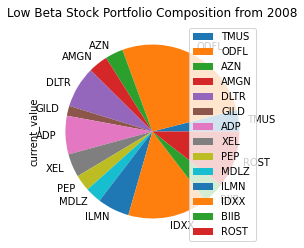

In [27]:
low_betas_price_2008_2022_df.plot.pie(y="current_value", title="Low Beta Stock Portfolio Composition from 2008")

<AxesSubplot:title={'center':'Low Beta Stock Portfolio dollar value from 2008'}, xlabel='ticker'>

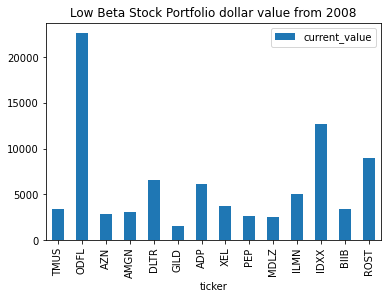

In [28]:
low_betas_price_2008_2022_df.plot.bar(y="current_value", title="Low Beta Stock Portfolio dollar value from 2008")

In [29]:
high_betas_price_2008_2022_df = pd.merge(high_betas_price_2008_df, tickers_2022_df, on='ticker',how='inner').set_index('ticker')    
high_betas_price_2008_2022_df = high_betas_price_2008_2022_df[['price_x','price_y']]
high_betas_price_2008_2022_df['percentage_change'] = percentage_change(high_betas_price_2008_2022_df['price_x'],high_betas_price_2008_2022_df['price_y'])   
high_betas_price_2008_2022_df

,price_x,price_y,percentage_change
ticker,,,
LULU,3.73,309.34,8193.297587
AMZN,2.54,118.01,4546.062992
ALGN,8.27,212.10,2464.691657
BIDU,12.69,121.40,856.658786
ADSK,18.97,190.98,906.747496
NVDA,1.84,127.36,6821.739130
AMD,2.21,68.36,2993.212670
SIRI,0.11,5.95,5309.090909
DXCM,0.63,83.33,13126.984127


In [30]:
capital = 10000
high_betas_2008_11_stock_allocation = [capital/12, capital/12, capital/12, capital/12, capital/12, capital/12, capital/12, capital/12, capital/12, capital/12, capital/12, capital/12]
high_betas_price_2008_2022_df['past_value'] = high_betas_2008_11_stock_allocation 
high_betas_price_2008_2022_df['current_value'] = high_betas_price_2008_2022_df['past_value']*high_betas_price_2008_2022_df['percentage_change']/100
high_betas_price_2008_2022_df

,price_x,price_y,percentage_change,past_value,current_value
ticker,,,,,
LULU,3.73,309.34,8193.297587,833.333333,68277.479893
AMZN,2.54,118.01,4546.062992,833.333333,37883.858268
ALGN,8.27,212.10,2464.691657,833.333333,20539.097138
BIDU,12.69,121.40,856.658786,833.333333,7138.823220
ADSK,18.97,190.98,906.747496,833.333333,7556.229134
NVDA,1.84,127.36,6821.739130,833.333333,56847.826087
AMD,2.21,68.36,2993.212670,833.333333,24943.438914
SIRI,0.11,5.95,5309.090909,833.333333,44242.424242
DXCM,0.63,83.33,13126.984127,833.333333,109391.534392


In [47]:
high_betas_price_2008_2022_df['current_value'].sum()

498959.4026203319

<AxesSubplot:title={'center':'high Beta Stock Portfolio Composition from 2008'}, ylabel='current_value'>

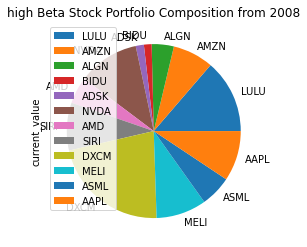

In [32]:
high_betas_price_2008_2022_df.plot.pie(y="current_value", title="high Beta Stock Portfolio Composition from 2008")

<AxesSubplot:title={'center':'high Beta Stock Portfolio dollar value from 2008'}, xlabel='ticker'>

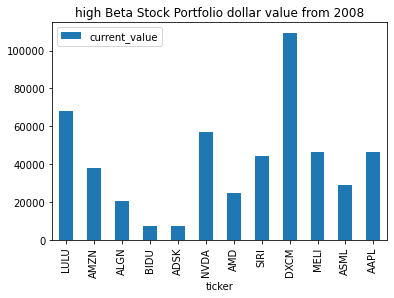

In [33]:
high_betas_price_2008_2022_df.plot.bar(y="current_value", title="high Beta Stock Portfolio dollar value from 2008")

In [34]:
low_betas_price_2012_2022_df = pd.merge(low_betas_price_2012_df, tickers_2022_df, on='ticker',how='inner').set_index('ticker')    
low_betas_price_2012_2022_df = low_betas_price_2012_2022_df[['price_x','price_y']]
low_betas_price_2012_2022_df['percentage_change'] = percentage_change(low_betas_price_2012_2022_df['price_x'],low_betas_price_2012_2022_df['price_y'])   
low_betas_price_2012_2022_df

,price_x,price_y,percentage_change
ticker,,,
META,21.66,141.61,553.785780
SPLK,36.72,82.05,123.447712
PANW,20.52,166.80,712.865497
VRSK,46.45,173.73,274.015070
VRTX,55.89,292.41,423.188406
DLTR,48.29,137.97,185.711327
XEL,20.06,68.91,243.519442
TSLA,1.95,287.81,14659.487179
ORLY,83.62,717.63,758.203779


In [39]:
capital = 10000
low_betas_2012_10_stock_allocation = [capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10]
low_betas_price_2012_2022_df['past_value'] = low_betas_2012_10_stock_allocation 
low_betas_price_2012_2022_df['current_value'] = low_betas_price_2012_2022_df['past_value']*low_betas_price_2012_2022_df['percentage_change']/100
low_betas_price_2012_2022_df

,price_x,price_y,percentage_change,past_value,current_value
ticker,,,,,
META,21.66,141.61,553.785780,1000.0,5537.857802
SPLK,36.72,82.05,123.447712,1000.0,1234.477124
PANW,20.52,166.80,712.865497,1000.0,7128.654971
VRSK,46.45,173.73,274.015070,1000.0,2740.150700
VRTX,55.89,292.41,423.188406,1000.0,4231.884058
DLTR,48.29,137.97,185.711327,1000.0,1857.113274
XEL,20.06,68.91,243.519442,1000.0,2435.194417
TSLA,1.95,287.81,14659.487179,1000.0,146594.871795
ORLY,83.62,717.63,758.203779,1000.0,7582.037790


In [43]:
low_betas_price_2012_2022_df['current_value'].sum()

181882.70790238224

<AxesSubplot:title={'center':'low Beta Stock Portfolio Composition from 2012'}, ylabel='current_value'>

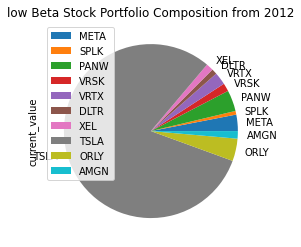

In [41]:
low_betas_price_2012_2022_df.plot.pie(y="current_value", title="low Beta Stock Portfolio Composition from 2012")

<AxesSubplot:title={'center':'low Beta Stock Portfolio dollar value from 2012'}, xlabel='ticker'>

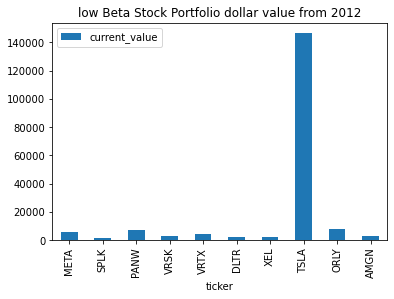

In [42]:
low_betas_price_2012_2022_df.plot.bar(y="current_value", title="low Beta Stock Portfolio dollar value from 2012")

In [36]:
high_betas_price_2012_2022_df = pd.merge(high_betas_price_2012_df, tickers_2022_df, on='ticker',how='inner').set_index('ticker')    
high_betas_price_2012_2022_df = high_betas_price_2012_2022_df[['price_x','price_y']]
high_betas_price_2012_2022_df['percentage_change'] = percentage_change(high_betas_price_2012_2022_df['price_x'],high_betas_price_2012_2022_df['price_y'])   
high_betas_price_2012_2022_df

,price_x,price_y,percentage_change
ticker,,,
FTNT,4.82,49.97,936.721992
KLAC,30.05,315.69,950.549085
BIDU,116.89,121.40,3.858328
MELI,80.66,865.24,972.700223
ALGN,36.97,212.10,473.708412
ADSK,33.35,190.98,472.653673
SIRI,2.32,5.95,156.465517
AMD,3.37,68.36,1928.486647
LULU,73.94,309.34,318.366243


In [48]:
capital = 10000
high_betas_2012_10_stock_allocation = [capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10, capital/10]
high_betas_price_2012_2022_df['past_value'] = high_betas_2012_10_stock_allocation 
high_betas_price_2012_2022_df['current_value'] = high_betas_price_2012_2022_df['past_value']*high_betas_price_2012_2022_df['percentage_change']/100
high_betas_price_2012_2022_df

,price_x,price_y,percentage_change,past_value,current_value
ticker,,,,,
FTNT,4.82,49.97,936.721992,1000.0,9367.219917
KLAC,30.05,315.69,950.549085,1000.0,9505.490849
BIDU,116.89,121.40,3.858328,1000.0,38.583283
MELI,80.66,865.24,972.700223,1000.0,9727.002232
ALGN,36.97,212.10,473.708412,1000.0,4737.084122
ADSK,33.35,190.98,472.653673,1000.0,4726.536732
SIRI,2.32,5.95,156.465517,1000.0,1564.655172
AMD,3.37,68.36,1928.486647,1000.0,19284.866469
LULU,73.94,309.34,318.366243,1000.0,3183.662429


In [49]:
high_betas_price_2012_2022_df['current_value'].sum()

67755.49900417241

<AxesSubplot:title={'center':'high Beta Stock Portfolio Composition from 2012'}, ylabel='current_value'>

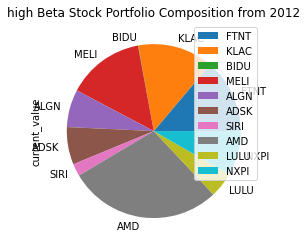

In [50]:
high_betas_price_2012_2022_df.plot.pie(y="current_value", title="high Beta Stock Portfolio Composition from 2012")

<AxesSubplot:title={'center':'high Beta Stock Portfolio dollar value from 2012'}, xlabel='ticker'>

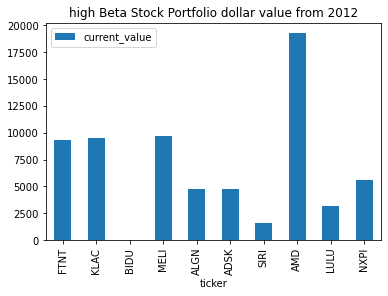

In [51]:
high_betas_price_2012_2022_df.plot.bar(y="current_value", title="high Beta Stock Portfolio dollar value from 2012")

In [ ]:
#What insight can you get from this analysis?
#This analysis suggests that a high beta stock portfolio is likely to beat the market (QQQ abd SPY) and a low beta stock portfolio. The only exception is when Tesla is involved. 
#Tesla, originally a low beta stock, outperform other stocks so much that a portfoilio of low beta stocks with tesla (which made $171882.7 in 10 years) still beat a high beta portfolio (which made $57755.5 in 10 years). 
#Without tesla, the low beta portfolio would have made less money than the high beta portfolio